Speech Classification
Linear Discriminant Analysis or LDA is a dimensionality reduction technique used to 
reduce the number of dimensions (i.e. variables) in a dataset while retaining as much 
information as possible. Using LDA based classification, we can find discriminative features 
for a given audio segment to achieve the task of Automatic Speech Classification such that 
speech belonging to the same class are close together, but samples from different classes 
are far apart from each other.
Question:
In order to implement LDA, first generate a dummy dataset (say IRIS dataset having 4 
features) and the use LDA to decrease the number of features to one/two. Now using this 
modified dataset, try to learn a classifier to test the performance of LDA for dimensionality 
reduction.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn import datasets

In [20]:
iris = datasets.load_iris()
X    = iris.data
y    = iris.target
#print(X,y)
features     = iris.feature_names
target_names = iris.target_names
print('Features--',features)
print('Target  --',target_names)

Features-- ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target  -- ['setosa' 'versicolor' 'virginica']


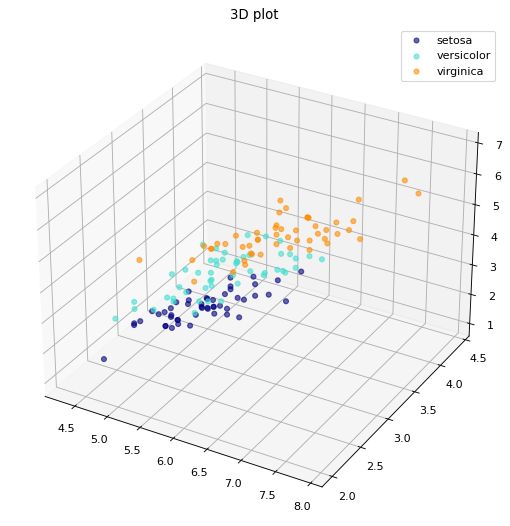

In [21]:
# plotting in 3-D
colors = ['navy','turquoise','darkorange']
fig    = plt.figure(figsize=(8,8),dpi=80)
ax     = fig.add_subplot(111,projection='3d') 

for color,i,target_names in zip(colors,[0,1,2],target_names):   
    ax.scatter(X[y==i,0],X[y==i,1],X[y==i,2],alpha=0.6,color=color,label=target_names)
plt.title('3D plot')
plt.legend()
plt.show()

In [22]:
X.shape

(150, 4)

In [23]:
# train test split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=30)

In [25]:
X_train.shape

(105, 4)

In [26]:
y_test

array([2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1])

In [27]:
#KNN classification for checking the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
acc = knn.score(X_test,y_test)
print('The accuracy of KNN on the original dataset : {}'.format(acc))

The accuracy of KNN on the original dataset : 0.9333333333333333


c:\Users\vedas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
# Comparing the result of KNN classifier after LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda2 = LinearDiscriminantAnalysis(n_components =2) # down scaling the dimension to 2D from original data
lda2.fit(X_train,y_train)
x_train_mod = lda2.transform(X_train)
x_test_mod  = lda2.transform(X_test)

In [29]:
knn.fit(x_train_mod,y_train)
acc = knn.score(x_test_mod,y_test)
print('The accuracy of KNN after LDA on the original dataset : {}'.format(acc))

The accuracy of KNN after LDA on the original dataset : 0.9555555555555556


c:\Users\vedas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


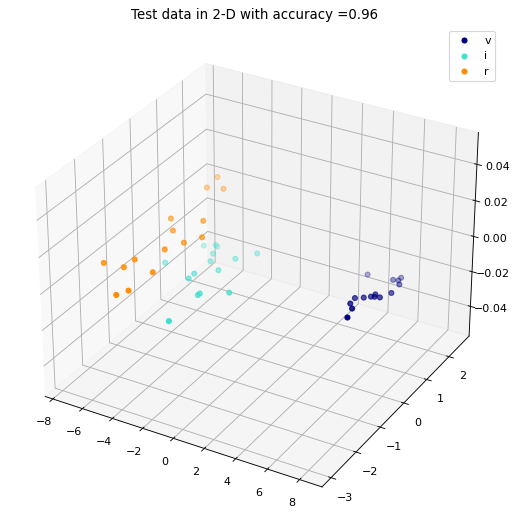

In [30]:
from mpl_toolkits import mplot3d
colors = ['navy','turquoise','darkorange']
fig    = plt.figure(figsize=(8,8),dpi=80)
ax     = fig.add_subplot(111,projection='3d')
for color,i,target_name in zip(colors,[0,1,2],target_names):
    plt.scatter(x_test_mod[y_test==i,0],x_test_mod[y_test==i,1],s=20,color=color,label=target_name)
plt.legend()
plt.title('Test data in 2-D with accuracy ={:.2f}'.format(acc))
plt.show()

In [31]:
# now converting 4D data to 1D
lda1 = LinearDiscriminantAnalysis(n_components =1) # down scaling the dimension to 2D from original data
lda1.fit(X_train,y_train)
x_train_mod1 = lda1.transform(X_train)
x_test_mod1  = lda1.transform(X_test)

knn.fit(x_train_mod1,y_train)
acc1 = knn.score(x_test_mod1,y_test)
print('The accuracy of KNN after LDA on the original dataset : {}'.format(acc1))

The accuracy of KNN after LDA on the original dataset : 0.9777777777777777


c:\Users\vedas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [32]:
x_test_mod1[0]

array([-5.96238128])

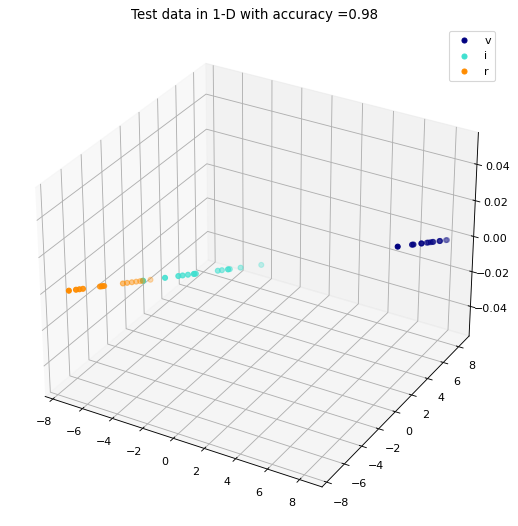

In [33]:
from mpl_toolkits import mplot3d
colors = ['navy','turquoise','darkorange']
fig    = plt.figure(figsize=(8,8),dpi=80)
ax     = fig.add_subplot(111,projection='3d')
for color,i,target_name in zip(colors,[0,1,2],target_names):
    plt.scatter(x_test_mod1[y_test==i],x_test_mod1[y_test==i],s=20,color=color,label=target_name)
plt.legend()
plt.title('Test data in 1-D with accuracy ={:.2f}'.format(acc1))
plt.show()